## Advanced Validation Lecture

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Dataset:  World Bowliards League

Bowliards is a highly competative sport, similar to bowling, that requires players to strike a set of inflatable 'bumpers' before their ball strikes the pins.   

My dataset today contains the results from the first round of the world bowliards show down.   We'd like to use this data to predict future successes (dependent variable 'win') based on the independent variables contained in the dataset. 

In [4]:
data = pd.read_csv("../data/bowliards.csv")

In [5]:
data.head()

,Unnamed: 0,player_number,shoe_size,games_this_season,games_last_season,games_career,times_faced_opponent,bounces_per_bowl,bumper_inflation,win
0,0,1000025,7,5,10,100,4,3,100,0
1,1,1002945,7,20,40,500,40,3,200,0
2,2,1015425,5,5,10,100,8,3,100,0
3,3,1016277,8,40,80,100,16,3,700,0
4,4,1017023,6,5,10,300,4,3,100,0


In [6]:
data = data.drop(['Unnamed: 0', 'player_number'], axis=1)

In [7]:
#Setting the feature we want to predict
y = data.pop("win")

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

### Grid Search!

In [9]:
### Grid Search
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)
                              

In [10]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [11]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
best_rfc = estimator.best_estimator_

### Accuracy



In [14]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print ("Accuracy: ", accuracy)

Accuracy:  0.971428571429


In [15]:
y_hat = best_rfc.predict(X_test)

In [16]:
y_hat

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0])

In [17]:
y_test

158    0
499    0
396    0
155    1
321    0
212    0
234    0
289    1
300    1
356    1
672    0
328    1
199    0
78     0
598    0
569    1
446    0
506    1
626    1
603    1
360    1
338    0
668    1
290    0
284    1
331    0
477    0
54     1
248    0
223    1
      ..
259    0
422    0
6      0
101    1
542    0
299    1
395    0
501    0
318    0
145    0
486    0
353    1
208    0
695    0
361    1
86     1
664    0
481    0
633    1
41     1
108    0
690    0
56     1
424    0
514    1
24     0
218    1
431    0
281    0
110    0
Name: win, dtype: int64

In [19]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print (correct / float(total))
        

0.9714285714285714


### Precision and Recall

In [21]:
print (classification_report(y_test, best_rfc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        95
          1       0.96      0.96      0.96        45

avg / total       0.97      0.97      0.97       140



Precision:   The model will correctly identify 96% of winners.   Conversely there is a 4% chance it will identify a non-winner as a winner.  (tp / tp+fp)

Recall:  Of the people the model identified as winners, 96% of them will actually be winners.  (tp / tp + fn)

In [23]:
print (confusion_matrix(y_test, best_rfc.predict(X_test)))

[[93  2]
 [ 2 43]]


**Precision:**  43 / 43 + 2 = .96

**Recall:**   43 / 43 + 2 = .96

### AUC

In [25]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print ("AUC Score: ", roc)

AUC Score:  0.996257309942


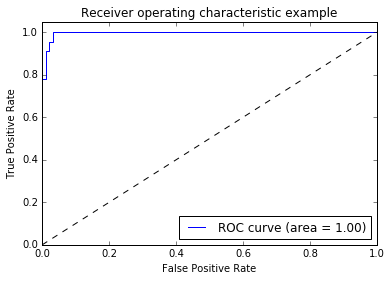

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### But!  

So far our entire strategy has been to fit a model as strongly as possible to our 20% holdout.   What if our 20% hold out doesn't contain the tricky cases, or certain edge cases?  What if our random 20% sample doesn't really reflect reality?

When we choose hyperparameters, we choose them to optimize the 20% holdout.   

Our model will overfit to the 20% holdout, and may not actually perform well in real life.




### Train, Test, Validation

What if instead, we split our data into three sets?   

Train = 60% for training

Validation = 20% for model tuning

Test = 20% for actual model testing.   Not used for parameter estimation.


**Pros:**  This keeps overfitting to our test set under control.   

**Cons:** Our training data keeps getting smaller.   

Good method for very large N, but here we have a smaller N.


### K-Fold Cross Validation

1.  Split the data into K chunks
2.  Train K models, retain a chunk for testing and use the other K-1 chunks for training.
3.  The result is K scores, which can be combined into a single average score for the model

In [27]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)

In [28]:
scores

array([ 0.94366197,  0.94285714,  0.97142857,  0.91428571,  0.98571429,
        0.98571429,  0.97142857,  0.98571429,  0.98550725,  1.        ])

In [29]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print ("Score is %f +/-  %f" % (mean_score, ci))
print ('95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

SyntaxError: invalid syntax (<ipython-input-29-9d3ed0ca02d7>, line 8)